<a href="https://colab.research.google.com/github/hanwo-ol/python_202601_lecture/blob/main/Day09_15_seaborn4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 금융 시계열 데이터 분석: Seaborn 및 Plotly 내장 데이터 활용

금융 데이터 분석에서는 시간의 흐름에 따른 가격의 변화(수익률), 변동성, 자산 간 상관관계를 파악하는 것이 핵심입니다. Seaborn의 `dowjones` 데이터와 Plotly의 `stocks` 데이터를 활용하여 시계열 분석 메소드를 학습합니다.

## 1. Seaborn `dowjones` 데이터셋 분석
다우존스 산업평균지수의 역사적 데이터를 통해 기본적인 시계열 전처리 및 추세 분석을 수행합니다.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
dj = sns.load_dataset('dowjones')

# 1.1 시계열 데이터 전처리
# 'Date' 컬럼을 datetime 객체로 변환하고 인덱스로 설정
dj['Date'] = pd.to_datetime(dj['Date'])
dj.set_index('Date', inplace=True)

# 1.2 데이터 재표본 추출 (Resampling)
# 일별 데이터를 연간 평균(Yearly)으로 요약
dj_yearly = dj.resample('Y').mean()

# 1.3 수익률 계산 (Percentage Change)
# 전일 대비 지수 변동률 계산
dj['Return'] = dj['Price'].pct_change()

dj.head()

/tmp/ipython-input-2262089912.py:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dj_yearly = dj.resample('Y').mean()


,Price,Return
Date,,
1914-12-01,55.00,NaN
1915-01-01,56.55,0.028182
1915-02-01,56.00,-0.009726
1915-03-01,58.30,0.041071
1915-04-01,66.45,0.139794


## 2. Plotly `stocks` 데이터셋 분석 (다중 자산 분석)
Plotly 라이브러리는 주요 IT 기업(Google, Apple, Amazon 등)의 주가 데이터를 제공합니다. 이를 통해 자산 간 비교 분석을 수행합니다.


In [6]:
import plotly.express as px

# Plotly 내장 주식 데이터 로드
stocks = px.data.stocks()

# 2.1 데이터 구조 확인
# Date, GOOG, AAPL, AMZN, FB, NFLX, MSFT 컬럼으로 구성됨
(stocks.head())

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [7]:
# 2.2 기준 시점 대비 누적 수익률 분석
# 데이터가 이미 기준일(첫 행) 대비 비율로 정규화되어 있음
# Wide format을 Long format으로 변환 (Melt)
stocks_long = stocks.melt(id_vars='date', var_name='Company', value_name='Relative_Price')

# 2.3 특정 기업 데이터 추출 및 이동평균(Moving Average) 계산
apple = stocks[['date', 'AAPL']].copy()
apple['date'] = pd.to_datetime(apple['date'])
apple.set_index('date', inplace=True)

# 5주 이동평균 및 20주 이동평균 계산 (추세 파악)
apple['MA5'] = apple['AAPL'].rolling(window=5).mean()
apple['MA20'] = apple['AAPL'].rolling(window=20).mean()

(apple)

,AAPL,MA5,MA20
date,,,
2018-01-01,1.000000,NaN,NaN
2018-01-08,1.011943,NaN,NaN
2018-01-15,1.019771,NaN,NaN
2018-01-22,0.980057,NaN,NaN
2018-01-29,0.917143,0.985783,NaN
...,...,...,...
2019-12-02,1.546914,1.515017,1.321960
2019-12-09,1.572286,1.532171,1.341220
2019-12-16,1.596800,1.547806,1.362769


## 3. 금융 시계열 심화 분석 메소드

### 3.1 변동성(Volatility) 분석
금융 리스크 관리의 핵심인 변동성을 이동 표준편차를 통해 산출합니다.

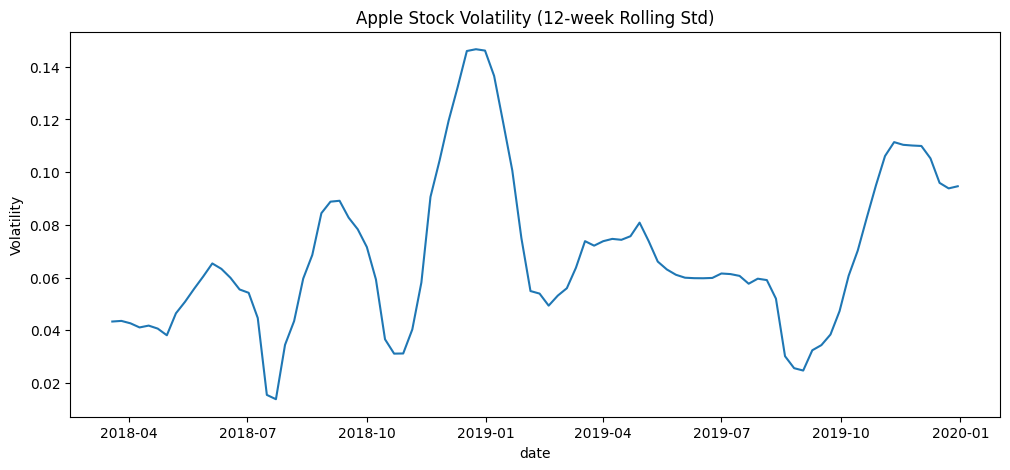

In [8]:
# 12주(약 1분기) 이동 표준편차를 통한 변동성 계산
apple['Volatility'] = apple['AAPL'].rolling(window=12).std()

plt.figure(figsize=(12, 5))
sns.lineplot(data=apple, x=apple.index, y='Volatility')
plt.title('Apple Stock Volatility (12-week Rolling Std)')
plt.show()

### 3.2 자산 간 상관관계 분석 (Correlation Matrix)
여러 주식 종목 간의 움직임이 얼마나 유사한지 분석합니다.


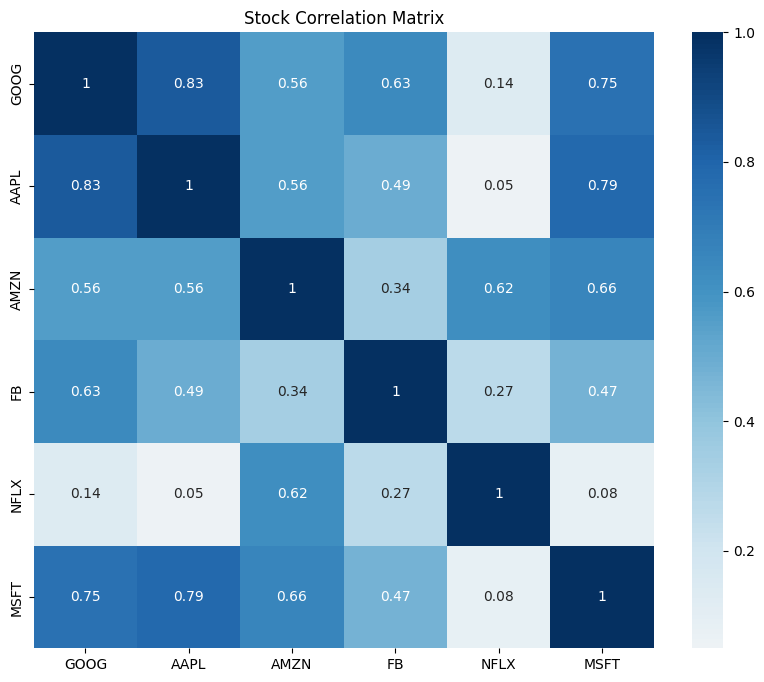

In [9]:
# 날짜 제외, 종목별 가격 데이터만 선택하여 상관계수 산출
corr_matrix = stocks.drop('date', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0)
plt.title('Stock Correlation Matrix')
plt.show()


### 3.3 데이터 시프트(Shift)를 이용한 전일 대비 비교
`shift` 메소드를 사용하여 과거 데이터를 현재 시점으로 가져와 연산을 수행합니다.


In [10]:
# 1주일(1 row) 전 가격 데이터 생성
apple['Last_Week_Price'] = apple['AAPL'].shift(1)

# 전주 대비 가격 차이 계산
apple['Price_Diff'] = apple['AAPL'] - apple['Last_Week_Price']
apple

,AAPL,MA5,MA20,Volatility,Last_Week_Price,Price_Diff
date,,,,,,
2018-01-01,1.000000,NaN,NaN,NaN,NaN,NaN
2018-01-08,1.011943,NaN,NaN,NaN,1.000000,0.011943
2018-01-15,1.019771,NaN,NaN,NaN,1.011943,0.007829
2018-01-22,0.980057,NaN,NaN,NaN,1.019771,-0.039714
2018-01-29,0.917143,0.985783,NaN,NaN,0.980057,-0.062914
...,...,...,...,...,...,...
2019-12-02,1.546914,1.515017,1.321960,0.109947,1.527143,0.019771
2019-12-09,1.572286,1.532171,1.341220,0.105241,1.546914,0.025371
2019-12-16,1.596800,1.547806,1.362769,0.095940,1.572286,0.024514


## 4. 시계열 데이터 시각화 기법

### 4.1 영역 차트(Area Chart)를 이용한 추세 시각화


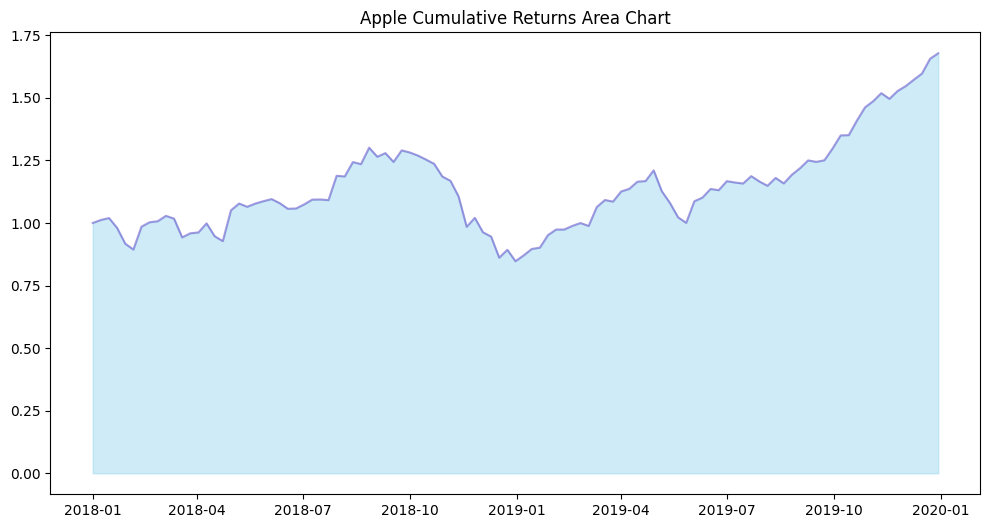

In [11]:
# 누적 수익률 시각화
plt.figure(figsize=(12, 6))
plt.fill_between(apple.index, apple['AAPL'], color="skyblue", alpha=0.4)
plt.plot(apple.index, apple['AAPL'], color="Slateblue", alpha=0.6)
plt.title('Apple Cumulative Returns Area Chart')
plt.show()

### 4.2 다중 플롯을 이용한 종목별 비교


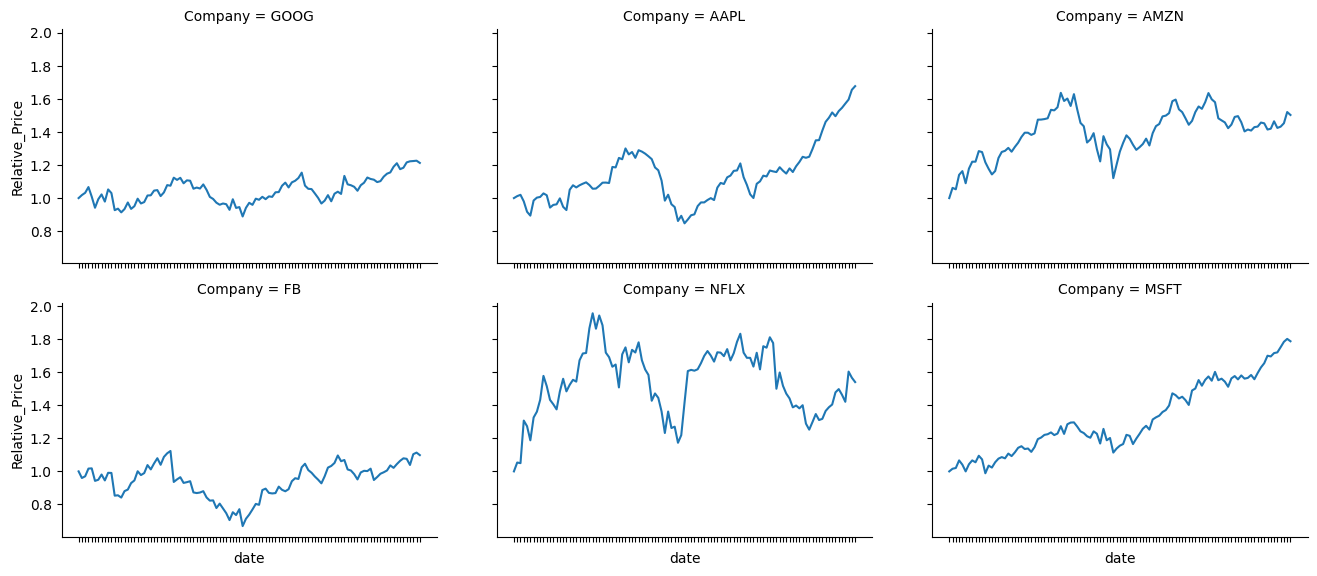

In [12]:
# FacetGrid를 이용한 기업별 주가 추이 분할 시각화
g = sns.FacetGrid(stocks_long, col="Company", col_wrap=3, height=3, aspect=1.5)
g.map(sns.lineplot, "date", "Relative_Price")
g.set_xticklabels(rotation=45)
plt.show()


## 5. 요약: 금융 시계열 핵심 메소드 명세
- `pd.to_datetime()`: 문자열 날짜 데이터를 시계열 객체로 변환
- `set_index()`: 시계열 분석을 위해 날짜 컬럼을 인덱스로 설정
- `resample()`: 시간 빈도 변경 (일별 -> 월별, 연별 등) 및 집계
- `pct_change()`: 현재 요소와 이전 요소 간의 백분율 변화율 계산
- `rolling(window=n)`: 크기가 n인 윈도우를 이동시키며 평균, 표준편차 등 계산
- `shift(n)`: 데이터를 n만큼 이동시켜 과거 또는 미래 데이터와 비교
- `corr()`: 시계열 자산 간의 선형 상관관계 계수 산출